# Introduction

In practice, many signals won't be periodic or may even have unknown period. So we have to learn to analyse these types of signals also. In this experiment, we analyse the DFTs (Digital Fourier Transforms) of signals which are not periodic and which has unknown period. We will analyse these type of functions with the help of a windowing function.

# Procedure

## Part - 0

In [1]:
#Importing required Libraries
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Part - 1

For the function $cos^3(\omega_0 t)$, we are obtaining its Fourier spectrum at $\omega_0=0.8$ with and without using a Hamming Window.

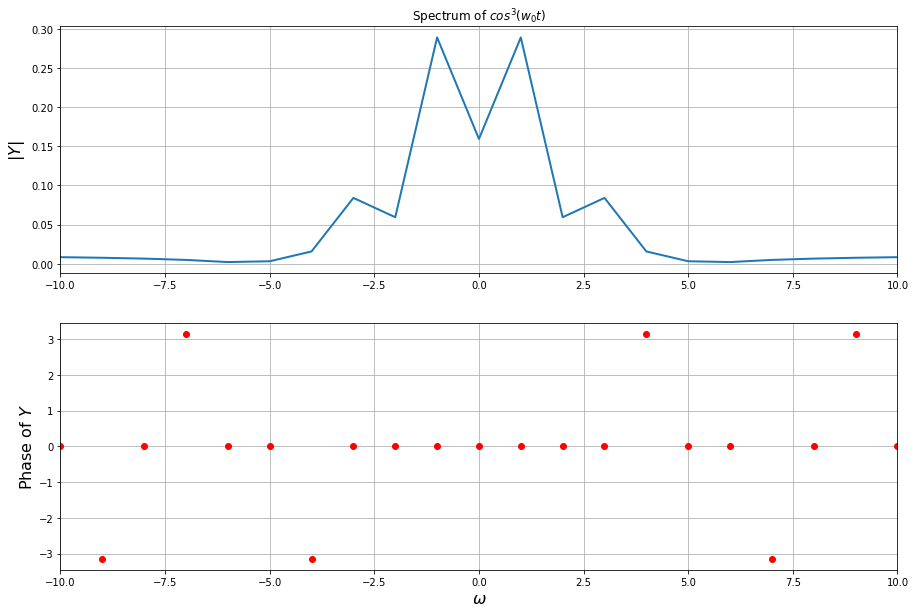

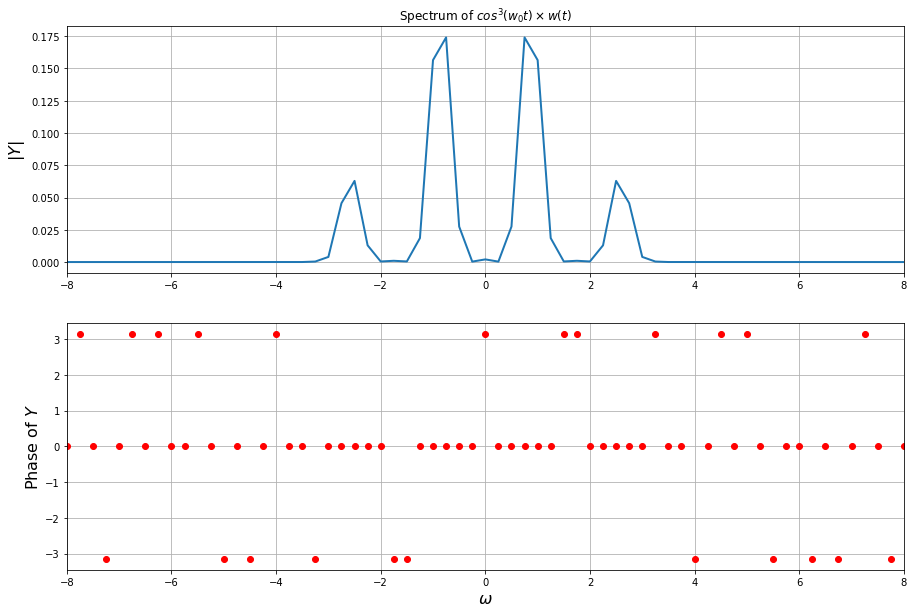

In [2]:
#Defining the function for which spectrum is to obtained
def cos_fun(x):
    return (cos(0.86*x))**3

#Function to plot the spectrum of a given function - both with and without Hamming Window
def plot_spec(func,ham_win=False):
    if(not ham_win):
        t=linspace(-pi,pi,65);t=t[:-1]
        dt=t[1]-t[0];fmax=1/dt
        y = func(t)
        y[0]=0 # the sample corresponding to -tmax should be set zeroo
        y=fftshift(y) # make y start with y(t=0)
        Y=fftshift(fft(y))/64.0
        w=linspace(-pi*fmax,pi*fmax,65);w=w[:-1]
        figure(figsize=(15,10))
        subplot(2,1,1)
        plot(w,abs(Y),lw=2)
        xlim([-10,10])
        ylabel(r"$|Y|$",size=16)
        title(r"Spectrum of $cos^3(w_0t)$")
        grid(True)
        subplot(2,1,2)
        plot(w,angle(Y),'ro',lw=2)
        xlim([-10,10])
        ylabel(r"Phase of $Y$",size=16)
        xlabel(r"$\omega$",size=16)
        grid(True)
        plt.show()
    else:
        t = linspace(-4*pi,4*pi,257);t=t[:-1]
        dt=t[1]-t[0];fmax=1/dt
        n=arange(256)
        wnd=fftshift(0.54+0.46*cos(2*pi*n/256))
        y = (func(t))*wnd
        y[0]=0 # the sample corresponding to -tmax should be set zeroo
        y=fftshift(y) # make y start with y(t=0)
        Y=fftshift(fft(y))/256.0
        w=linspace(-pi*fmax,pi*fmax,257);w=w[:-1]
        figure(figsize=(15,10))
        subplot(2,1,1)
        plot(w,abs(Y),lw=2)
        xlim([-8,8])
        ylabel(r"$|Y|$",size=16)
        title(r"Spectrum of $cos^3(w_0t)\times w(t)$")
        grid(True)
        subplot(2,1,2)
        plot(w,angle(Y),'ro',lw=2)
        xlim([-8,8])
        ylabel(r"Phase of $Y$",size=16)
        xlabel(r"$\omega$",size=16)
        grid(True)
        plt.show()
        
plot_spec(cos_fun,ham_win=False)
plot_spec(cos_fun,ham_win=True)

We can see that using a window function smears the peaks in the DFT, hence we are able to notice the peaks much clearly.

## Part - 2

In this part, we have to write a function which takes vector of size 128 which contains datapoints of the function $\cos(\omega_0t + \delta)$ for arbitary values of $\omega_0$ and $\delta$.<br>
Our task is to find the values of $\omega_0$ and $\delta$.

### Calculating $\omega_0$ and $\delta$

The resolution of the spectrum for the given function is not enough to accurately determine both $\omega_0$. Hence, we are going to use a statistical approach to calculate these values. Here, we are going to use a weighted sum formula to calculate the signal's frequency. The formula used is : <br>
$$ \omega_0 = \frac{\sum \omega_i |Y(\omega_i)|^{2.1}}{\sum |Y(\omega_i)|^{2.1}} $$
<br>
The angle $\delta$ can be found by calculating phase at one of the peaks.

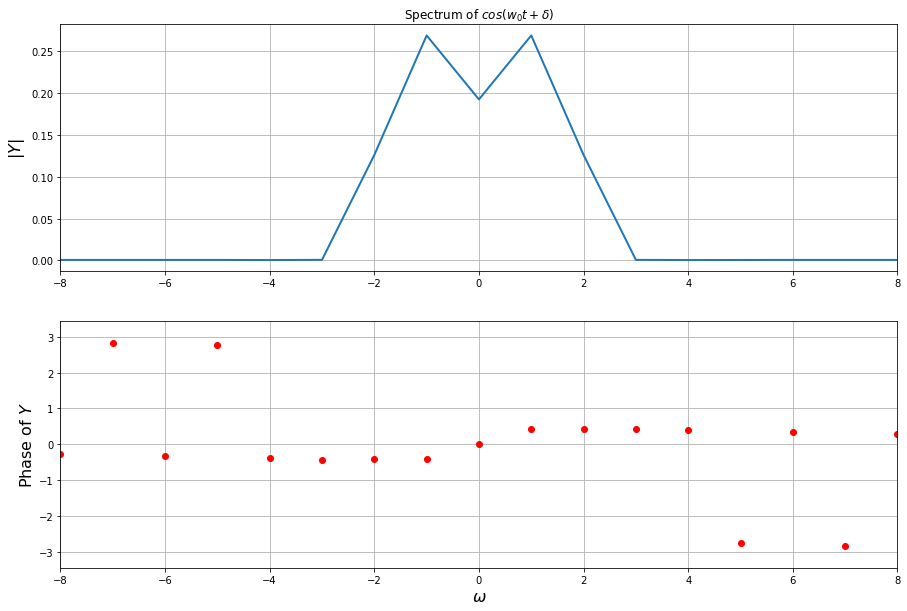

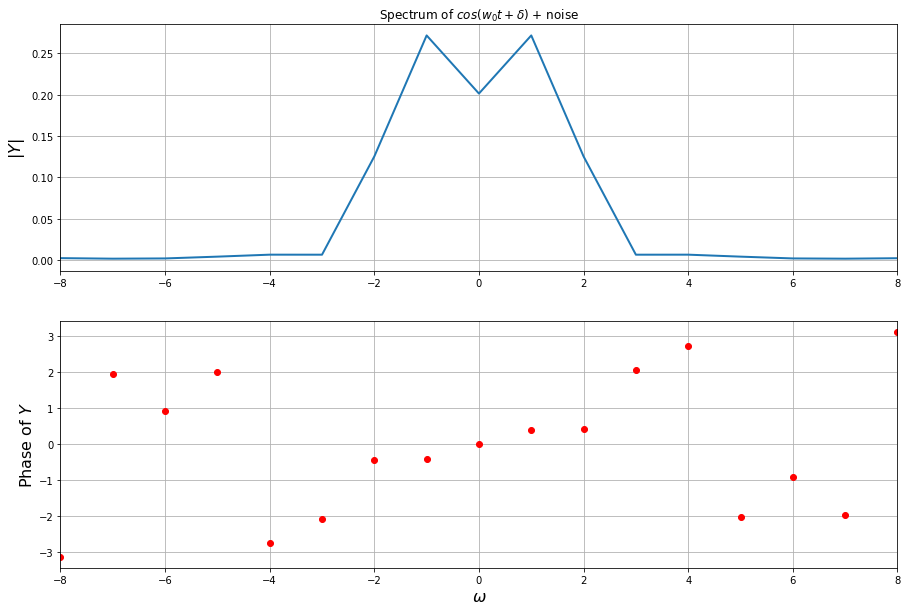

Original Frquency = 1.0488135039273248
Original Phase = 0.417022004702574

Calculated values when Gaussian noise is not added
Calculated Frquency = 0.9731186900009238
Calculated Phase = 0.41996666297513685

Calculated values when Gaussian noise is added
Calculated Frquency = 1.0069988301000827
Calculated Phase = 0.40057649869133083


In [3]:
#Function to estimate freq. and phi of cos(wt+phi) given a vector 'y' of shape 128
def find_w(y,n,add_noise=False):
    #Adding noise to the given vector
    if(add_noise):
        y = y + 0.1*np.random.randn(n)
    t = linspace(-pi,pi,n+1);t=t[:-1]
    dt=t[1]-t[0];fmax=1/dt
    N=arange(n)
    wnd=fftshift(0.54+0.46*cos(2*pi*N/n))
    y = (y)*wnd
    y[0]=0
    y=fftshift(y)
    Y=fftshift(fft(y))/n
    w=linspace(-pi*fmax,pi*fmax,n+1);w=w[:-1]
    
    #plotting spectrum
    figure(figsize=(15,10))
    subplot(2,1,1)
    plot(w,abs(Y),lw=2)
    xlim([-8,8])
    ylabel(r"$|Y|$",size=16)
    if(add_noise):
        title(r"Spectrum of $cos(w_0t + \delta )$ + noise")
    else:
        title(r"Spectrum of $cos(w_0t + \delta )$")
    grid(True)
    subplot(2,1,2)
    plot(w,angle(Y),'ro',lw=2)
    xlim([-8,8])
    ylabel(r"Phase of $Y$",size=16)
    xlabel(r"$\omega$",size=16)
    grid(True)
    plt.show()
    
    #calculating freq. and phi
    phi = angle(Y[n//2 +1])
    if(add_noise):
        frq = sum(abs(Y**2.5)*abs(w))/sum(abs(Y**2.5))
    else:
        frq = sum(abs(Y**2.1)*abs(w))/sum(abs(Y**2.1))
    return frq, phi

seed_W = 0
np.random.seed(seed_W)
W = np.random.random() + 0.5
seed_P = 1
np.random.seed(seed_P)
P = np.random.random()

n = 128
t = linspace(-pi,pi,n+1);t=t[:-1]
vec = cos((W*t) + P)

w1, p1 = find_w(vec,n)
w2, p2 = find_w(vec,n,add_noise=True)

print('Original Frquency = ' + str(W))
print('Original Phase = ' + str(P))
print()
print('Calculated values when Gaussian noise is not added')
print('Calculated Frquency = ' + str(w1))
print('Calculated Phase = ' + str(p1))
print()
print('Calculated values when Gaussian noise is added')
print('Calculated Frquency = ' + str(w2))
print('Calculated Phase = ' + str(p2))

Our predicted values of $\omega_0$ and $\delta$ are close to the original values.

## Part - 3

In this part, our goal is to plot the *DFT* of the function $\cos(16 \ (1.5 + \frac{t}{2\pi}) \ t)$, where $-\pi \leq t \leq \pi$ in *1024* steps. This is function is known as *chirped* signal.<br>
We can observe that, its frequency continuously changes from 16 to 32 radians per second. This also means that the period is 64 samples near $-\pi$ and is 32 samples near $\pi$.

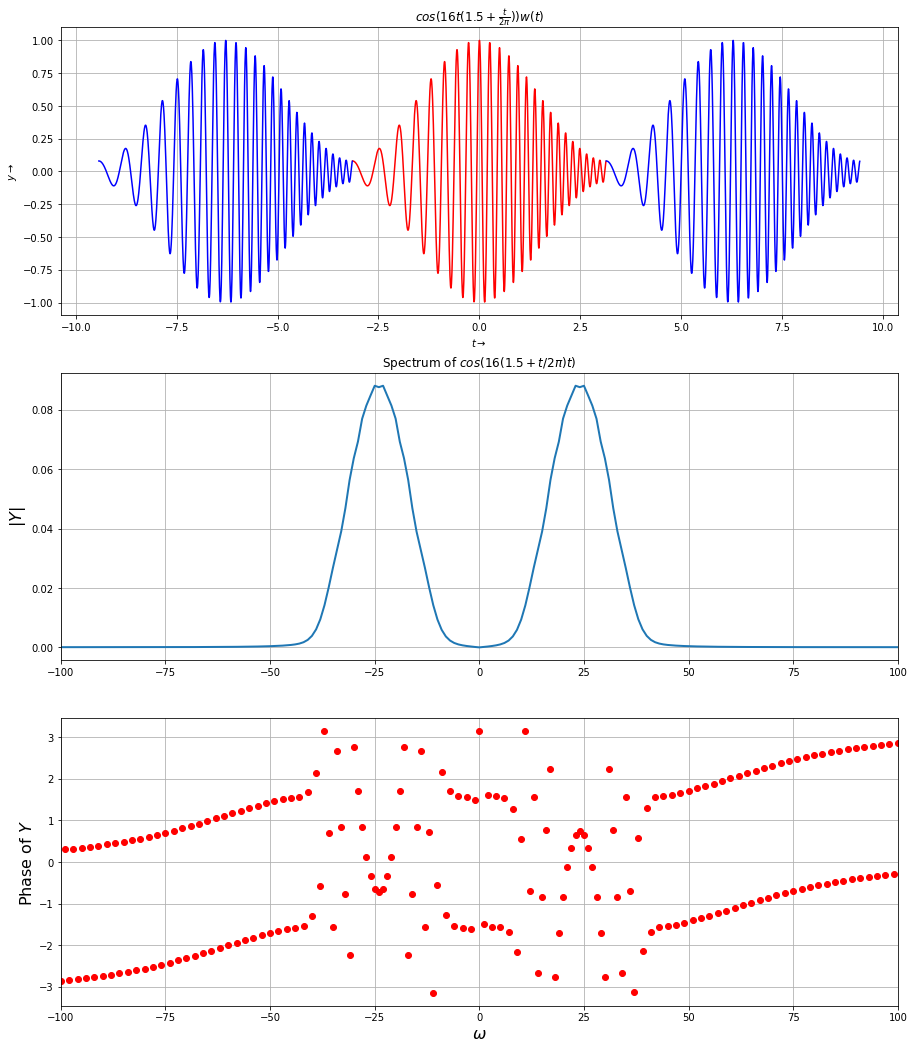

In [4]:
#plotting the chirp function
n = 1024
t = linspace(-pi,pi,n+1);t = t[:-1]
t1 = np.linspace(-3*pi,-pi,n+1);t1 = t1[:-1]
t2 = np.linspace(pi,3*pi,n+1);t2 = t2[:-1]
dt=t[1]-t[0];fmax=1/dt
y = cos(16*t*(1.5 + (t/(2*pi))))
N = np.arange(n)
wnd = fftshift(0.54+0.46*cos(2*pi*N/(n)))
y = y*wnd

figure(figsize=(15,18))
subplot(3,1,1)
plot(t,y,'r')
plot(t1,y,'b')
plot(t2,y,'b')
title(r'$cos(16t(1.5+\frac{t}{2\pi}))w(t)$')
ylabel(r'$y\rightarrow$')
xlabel(r'$t\rightarrow$')
grid(True)

y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/n
w=linspace(-pi*fmax,pi*fmax,n+1);w=w[:-1]

#plotting the spectrum of the chirp function
subplot(3,1,2)
plot(w,abs(Y),lw=2)
xlim([-100,100])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $cos(16(1.5 + t/2\pi)t)$")
grid(True)
subplot(3,1,3)
plot(w,angle(Y),'ro',lw=2)
xlim([-100,100])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
plt.show()

## Part - 4

In this part, our goal is to plot a Time-Frequency plot of the chirped signal and then plot a surface plot to show how frequency varies with time.

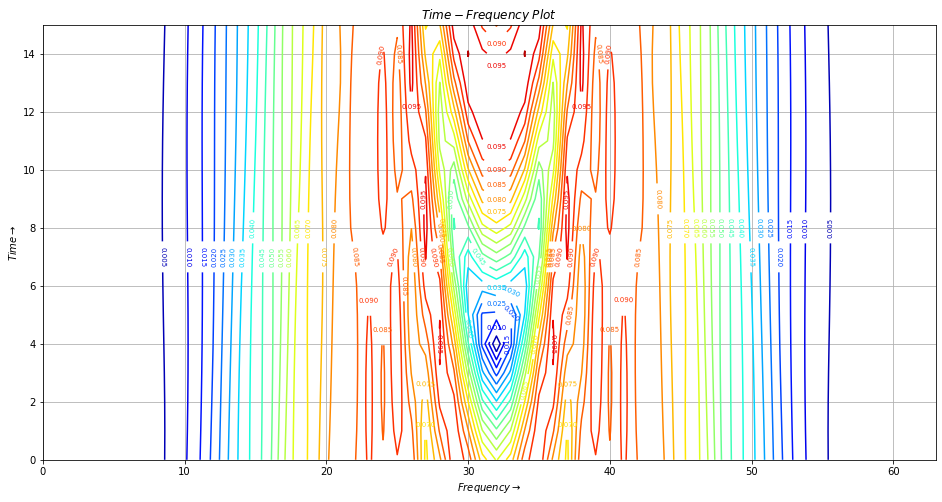

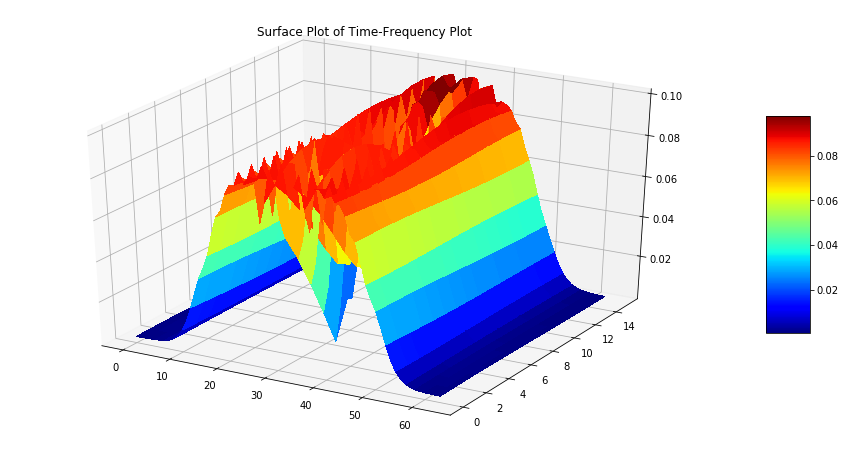

In [5]:
#Splitting the 1024 size vector into 16 vectors of size 64
n = 1024
t = linspace(-pi,pi,n+1);t = t[:-1]
t = t.reshape((64,-1))
Y = np.zeros_like(t,dtype=np.complex128)
for i in range(t.shape[1]):
    x = t[:,i]
    y = cos(16*x*(1.5+x/(2*pi)))
    N = np.arange(64)
    wnd = np.fft.fftshift(0.54+0.46*np.cos(2*pi*N/(63)))
    y = y*wnd
    y[0] = 0
    y = np.fft.fftshift(y)
    Y[:,i] = fftshift(fft(y))/64.0

#plotting the magnitude of the function as a function of time and frequency
x = np.arange(t.shape[1])
y = np.arange(t.shape[0])
y,x = np.meshgrid(y,x)

Y = fftshift(Y,axes=0)
figure(figsize=(16,8))
grid(True)
title(r'$Time-Frequency\;Plot$')
ylabel(r'$Time\rightarrow$')
xlabel(r'$Frequency\rightarrow$')
cp = plt.contour(y,x,abs(Y.T),20,cmap=cm.jet)
clabel(cp,inline=True,fontsize=7)
plt.show()

#plotting the surface-plot of the given chrip function
fig = figure(figsize=(16,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(y,x,abs(Y.T),cmap=cm.jet,linewidth=0, antialiased=False)
plt.title(r'Surface Plot of Time-Frequency Plot')
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Conclusion

In this experiment, we have taken various non-periodic signals and analysed their *DFTs* with the help of window functions.